In [2]:
# import requirement library to load dataset and define different type of models
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [3]:
# load MNIST dataset to use its data ro define model
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train / 255
y_train = y_train

In [5]:
# define sequential model and add convolutional layers
model = models.Sequential()

model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (5, 5), activation="relu"))
model.add(layers.Conv2D(32, (5, 5), activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())

model.add(layers.Dense(10, activation="softmax"))

In [6]:
# show interface of layer of defined sequential model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 10)                32010     
                                                                 
Total params: 58474 (228.41 KB)
Trainable params: 58474 (228.41 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

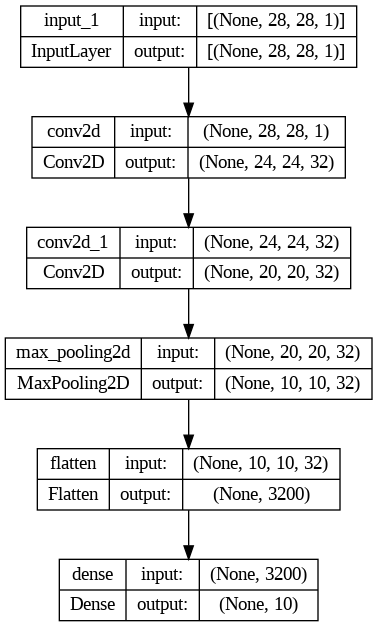

In [7]:
# show plot of layers seem like diagram or UML chart to show defined model
import graphviz
tf.keras.utils.plot_model(model, to_file='model_plot.png',
                          show_shapes=True, show_layer_names=True)

In [8]:
# create functional or my describe of this model is input of any not output of last layer
# they have diffrent and multiple input from others layers outputs

input = layers.Input(shape=(28, 28, 1), name='myinput')

conv1 = layers.Conv2D(32, (5, 5), activation="relu", name='conv1')(input)
conv2_1 = layers.Conv2D(32, (1, 1), activation="relu", padding='same')(conv1)
conv2_2 = layers.Conv2D(32, (3, 3), activation="relu", padding='same')(conv1)
conv2_3 = layers.Conv2D(64, (5, 5), activation="relu", padding='same')(conv1)

concat = layers.Concatenate()([conv2_1, conv2_2, conv2_3])
pool = layers.MaxPooling2D()(concat)
flatten = layers.Flatten()(pool)

output = layers.Dense(10, activation="softmax")(flatten)

model = models.Model(inputs=[input], outputs=[output])

In [9]:
# show what layers are connected to with others layers
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 myinput (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 24, 24, 32)           832       ['myinput[0][0]']             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 24, 24, 32)           1056      ['conv1[0][0]']               
                                                                                                  
 conv2d_3 (Conv2D)           (None, 24, 24, 32)           9248      ['conv1[0][0]']               
                                                                                              

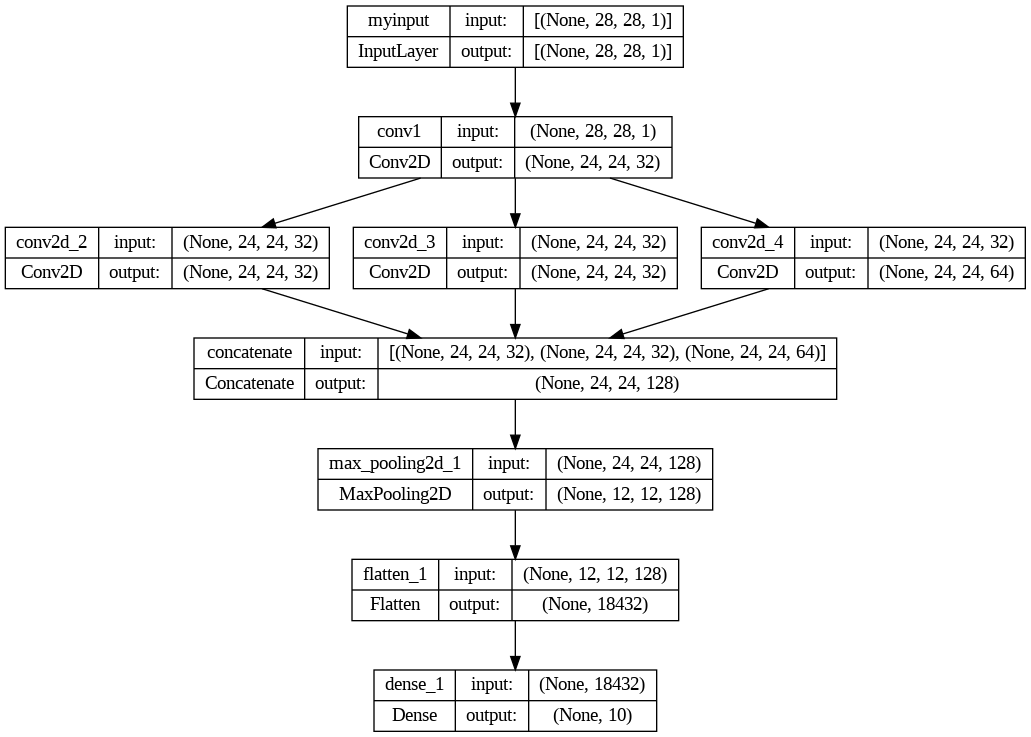

In [10]:
# show better presentation I use chart of table better understand connected layers
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)